In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import pandas as pd #working with dataframes
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn.preprocessing import StandardScaler, RobustScaler #scale data
from sklearn.model_selection import train_test_split #for splitting data
from imblearn.under_sampling import RandomUnderSampler #for undersampling 
from imblearn.over_sampling import RandomOverSampler #for oversampling
from imblearn.over_sampling import SMOTE #for smote
from imblearn.under_sampling import NearMiss  #near miss undersampling
from sklearn import tree # for decision tree
#for roc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report # classification report: precision, recall
from sklearn.linear_model import LogisticRegression #linear regression
from sklearn.svm import SVC #svc
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import RandomForestClassifier #random forest
import xgboost as xgb #XGBoost

In [3]:
#load the data
dt=pd.read_csv("creditcard.csv")
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#to check for basic summary of the data
dt.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:
#check for missinf values
dt.isnull()
#check if we have any missing values
print(dt.isnull().values.any())
#check numver of total missing values
print(dt.isnull().sum())

False
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Count the value of the target class # 

In [7]:
print(dt['Class'].value_counts())
# proportion
print(dt['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

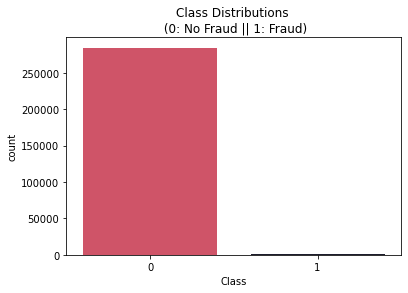

In [8]:
#plot
colors = ["#E43F5A", "#1B1B2F"]

sns.countplot('Class', data=dt, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

In [9]:
# Plot graphs to see behaviour of time and amount # 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


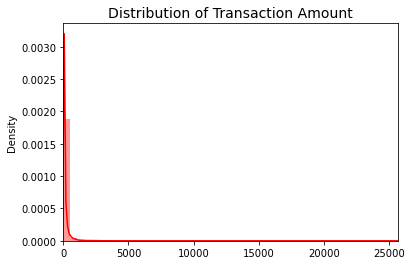

In [10]:
# fig=plt.figure()

amount_val = dt['Amount'].values
time_val = dt['Time'].values

# plt.subplot(2,1,1)
sns.distplot(amount_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([min(amount_val), max(amount_val)])


plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


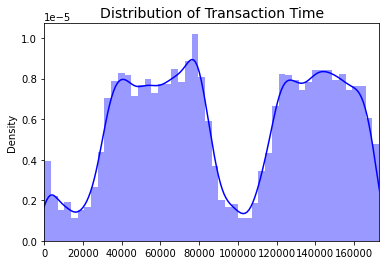

In [11]:
# plt.subplot(2,1,2)
sns.distplot(time_val,color='b')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


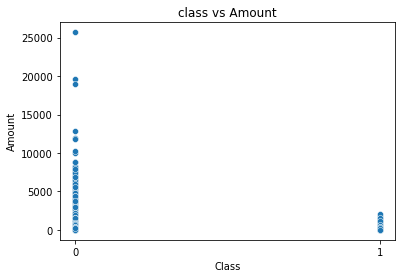

In [12]:
plt.xticks([0,1])
sns.scatterplot(dt['Class'].values, dt['Amount'].values)
plt.title("class vs Amount")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

In [13]:
# Data preparation # 

In [14]:
#drop the time column

dt=dt.drop("Time",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Convert the Class column into Categories # 

In [16]:
#convering class in categories
dt["Class"] = dt["Class"].astype('category')
dt["Class"] = dt["Class"].cat.rename_categories({0: 'Not_Fraud', 1: 'Fraud'})
dt["Class"]

0         Not_Fraud
1         Not_Fraud
2         Not_Fraud
3         Not_Fraud
4         Not_Fraud
            ...    
284802    Not_Fraud
284803    Not_Fraud
284804    Not_Fraud
284805    Not_Fraud
284806    Not_Fraud
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Not_Fraud', 'Fraud']

In [17]:
# Scale the data # 

In [18]:
scaler = RobustScaler().fit(dt.iloc[:,:-1])

scaler.transform(dt.iloc[:,:-1])
dt.head() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Not_Fraud
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Not_Fraud
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Not_Fraud
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Not_Fraud
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Not_Fraud


In [19]:
# Split the data into test and train data # 

In [20]:
#split
x=dt.iloc[:,:-1]
y=dt.iloc[:,-1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
# Check proportion of values in the target class # 

In [22]:
#check proportion of class

print(yTrain.value_counts())
print(yTest.value_counts())
# proportion
print(yTrain.value_counts(normalize=True))
print(yTest.value_counts(normalize=True))

Not_Fraud    227454
Fraud           391
Name: Class, dtype: int64
Not_Fraud    56861
Fraud          101
Name: Class, dtype: int64
Not_Fraud    0.998284
Fraud        0.001716
Name: Class, dtype: float64
Not_Fraud    0.998227
Fraud        0.001773
Name: Class, dtype: float64


In [23]:
# Under- Sampling # 

In [24]:
rus = RandomUnderSampler(sampling_strategy='auto',random_state=9650)
X_res, y_res = rus.fit_resample(xTrain, yTrain)
# print(X_res.value_counts())
print(y_res.value_counts())
# y_res.head()
print(X_res.shape)
print(y_res.shape)

Not_Fraud    391
Fraud        391
Name: Class, dtype: int64
(782, 29)
(782,)


In [25]:
# Over-Sampling # 

In [26]:
ros = RandomOverSampler(sampling_strategy='auto',random_state=9650)
X_ros, y_ros = ros.fit_resample(xTrain, yTrain)
print(y_ros.value_counts())
print(X_ros.shape)
print(y_ros.shape)

Not_Fraud    227454
Fraud        227454
Name: Class, dtype: int64
(454908, 29)
(454908,)


In [27]:
# SMOTE # 

In [28]:
sm = SMOTE(sampling_strategy='auto',random_state=9650)
X_sm, y_sm = sm.fit_resample(xTrain, yTrain)
print(y_sm.value_counts())
print(X_sm.shape)
print(y_sm.shape)

Not_Fraud    227454
Fraud        227454
Name: Class, dtype: int64
(454908, 29)
(454908,)


In [29]:
# Near-miss Algorithm # 

In [30]:
nr = NearMiss(sampling_strategy='auto')
X_nr, y_nr = nr.fit_resample(xTrain, yTrain)
print(y_nr.value_counts())
print(X_nr.shape)
print(y_nr.shape)

Not_Fraud    391
Fraud        391
Name: Class, dtype: int64
(782, 29)
(782,)


In [31]:
# Modelling # 

In [32]:
#function to plot ROC
def roc_plot(fpr,tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
def test_auc_roc_classification_score(clf):
    probs = clf.predict_proba(xTest)
    probs = probs[:, 1]
    auc = roc_auc_score(yTest, probs)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(yTest,probs, pos_label='Not_Fraud')
    roc_plot(fpr,tpr)
    predicted=clf.predict(xTest)
    report = classification_report(yTest, predicted)
    print(report)
    return auc

In [33]:
# On original Training set # 

AUC: 0.89


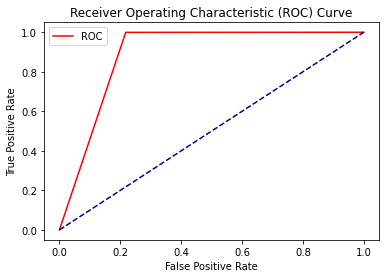

              precision    recall  f1-score   support

       Fraud       0.77      0.78      0.77       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



0.8908780679513583

In [34]:
clf = tree.DecisionTreeClassifier()
#for original training dataset
clf = clf.fit(xTrain, yTrain)

test_auc_roc_classification_score(clf)

In [35]:
# On under-sampled data # 

AUC: 0.91


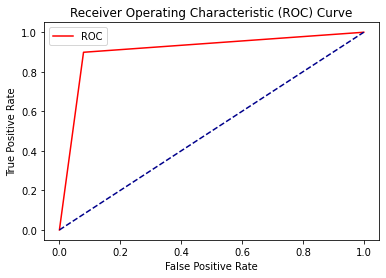

              precision    recall  f1-score   support

       Fraud       0.02      0.92      0.03       101
   Not_Fraud       1.00      0.90      0.95     56861

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.94     56962



0.9097374159427514

In [36]:
clf_under = tree.DecisionTreeClassifier()
clf_under = clf_under.fit(X_res, y_res)
test_auc_roc_classification_score(clf_under)

In [37]:
# On over-sampled data # 

AUC: 0.92


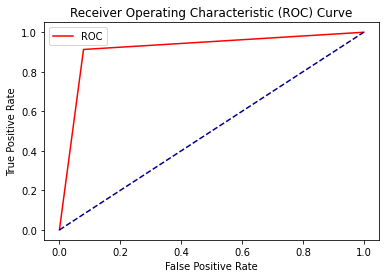

              precision    recall  f1-score   support

       Fraud       0.02      0.92      0.04       101
   Not_Fraud       1.00      0.91      0.95     56861

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.91      0.95     56962



0.9168512549536728

In [38]:
clf_o = tree.DecisionTreeClassifier()
clf_o = clf.fit(X_res, y_res)
test_auc_roc_classification_score(clf_o)

In [39]:
# On SMOTE # 

AUC: 0.90


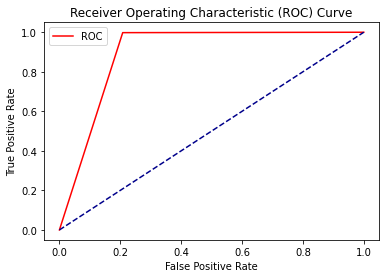

              precision    recall  f1-score   support

       Fraud       0.41      0.79      0.54       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



0.8950107792826733

In [40]:
clf_sm = tree.DecisionTreeClassifier()
clf_sm = clf.fit(X_sm, y_sm)
test_auc_roc_classification_score(clf_sm)

In [41]:
# On NearMiss dataset # 

AUC: 0.51


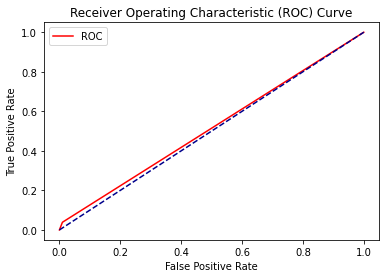

              precision    recall  f1-score   support

       Fraud       0.00      0.99      0.00       101
   Not_Fraud       1.00      0.04      0.07     56861

    accuracy                           0.04     56962
   macro avg       0.50      0.51      0.04     56962
weighted avg       1.00      0.04      0.07     56962



In [42]:
clf_nr = tree.DecisionTreeClassifier()
clf_nr = clf.fit(X_nr, y_nr)
auc_nm=test_auc_roc_classification_score(clf_nr)

In [43]:
# Logistic Regression # 

AUC: 0.99


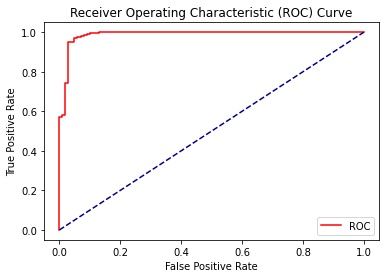

              precision    recall  f1-score   support

       Fraud       0.07      0.93      0.12       101
   Not_Fraud       1.00      0.98      0.99     56861

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [44]:
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(X_ros, y_ros)
auc_reg=test_auc_roc_classification_score(reg)

In [45]:
# KNN # 

AUC: 0.89


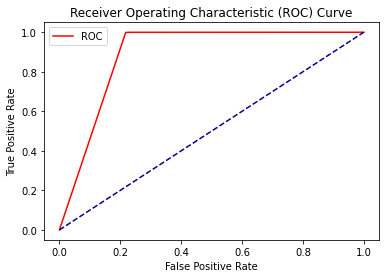

              precision    recall  f1-score   support

       Fraud       0.71      0.77      0.74       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
knn_clf = KNeighborsClassifier().fit(X_ros, y_ros)
auc_knn=test_auc_roc_classification_score(knn_clf)

In [47]:
# Random Forest # 

AUC: 0.97


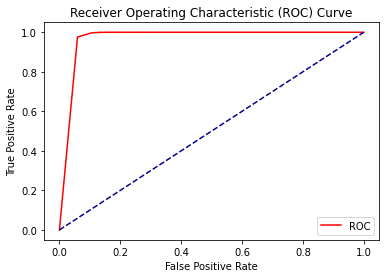

              precision    recall  f1-score   support

       Fraud       0.93      0.80      0.86       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [48]:
rf_clf = RandomForestClassifier().fit(X_ros, y_ros)
auc_rf=test_auc_roc_classification_score(rf_clf)

In [49]:
# XGBoost # 

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.98


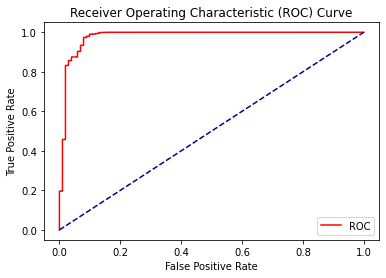

              precision    recall  f1-score   support

       Fraud       0.13      0.90      0.22       101
   Not_Fraud       1.00      0.99      0.99     56861

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [51]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimator=100, learning_rate=0.05).fit(X_ros, y_ros)
auc_xgb=test_auc_roc_classification_score(xgb_clf)

In [53]:
# print(auc_reg)
m=max(auc_xgb, auc_reg, auc_knn, auc_rf)
if(m==auc_xgb):
    print("XGBoost performs the best")
elif(m==auc_reg):
    print("Logistic Regresion performs the best")
elif(m==auc_rf):
    print("Random Forest performs the best")
else:
    print("KNN performs the best")

Logistic Regresion performs the best
